# Video Games Sales Exploratory Data Analysis

A brief introduction to the dataset and columns is given below.

This dataset contains a list of video games with sales greater than 100,000 copies. A description of all the columns is given below.

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

### All information and data has been take from Kaggle dataset of Video Games Sales
### Link: https://www.kaggle.com/gregorut/videogamesales

In [204]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [205]:
# Importing the csv file into a dataframe called vg_data
vg_data = pd.read_csv("Documents\\Python_data\\video_games_sales.csv")

In [206]:
# Displaying first 5 rows of the data
vg_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [207]:
vg_data.shape

(16598, 11)

In [208]:
# To check which column is having missing values
# Info also gives us the different column names and their data types
vg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [209]:
# Another way to check for missing values
vg_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### We can see that in total there are 16598 rows and 11 columns
### Year and Publisher are missing data (i.e these columns have null values)

In [210]:
# Decribe gives us a statistical summary of all columns.
#It's a good practice to show numerical and object/categorical columns separately
vg_data.describe(include=[np.number])

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [211]:
# Description of the object type columns
vg_data.describe(include=[object])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [212]:
# Looking at those games which have null values 
vg_data[vg_data['Publisher'].isnull()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64


In [213]:
vg_data[vg_data['Year'].isnull()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


### Some Games have a Year mentioned in the Name column which could be used to populate the Year column.
### For example, FIFA Soccer 2004 would have year 2004 - 1 = 2003, since these kind of games are released a year prior to the date mentioned. But this would be a tedious and manual task since we would need to confirm every single game's release date. Also most games don't have a year written in their name


In [216]:
# Looking at the Publisher names, there is an 'Unknown' type present. We can replace NaN values with Unknown.
# We can also replace the Year null values with Unknown using fillna() for the entire dataframe
vg_data['Publisher'] = vg_data['Publisher'].fillna('Unknown')
vg_data['Year'] = vg_data['Year'].fillna(0)

In [217]:
# No more null values
vg_data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### For EDA, replacing the null values would work just fine. But if we were to run a model to predict some value or run a model on the data, it would be better to just drop these rows (less than 2% of the total data) or manually fill in these values. There also seems to be some redundant data for 2020 (just one game) which was not removed.

In [218]:
# Checking for duplicate values
vg_data.duplicated().sum()

0

In [80]:
vg_data['Name'].duplicated().sum()

5105

#### Name has some duplicates. We need to further explore the possible reason, since overall the dataset has no two same rows

In [87]:
vg_data[vg_data['Name'].duplicated()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98


#### As expected, the games are available on different platforms which correspond to different sales across regions. So nothing to be changed here. We can start with  the plotting of graphs now. 

## Plotting Graphs
### A good method here would be to define a function with which we would be able to plot each of the categorical columns (Name, Platform, Year, Genre, Publisher) against the Region-wise Sales. So each time we could just call the function instead of repeating the code

In [150]:
# Defining a function to display Top 10 categories for each column against Sales through a bar graph 
list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
def sales_data(df,col):
    
    plot_data = df.groupby([col]).agg({list[0]:sum,list[1]:sum,list[2]:sum,list[3]:sum,list[4]:sum}).reset_index()
    
    plt.figure(figsize=(15,14))
    plt.subplot(3,2,1)
    sns.barplot(x=list[0],y=col,data=plot_data.sort_values(list[0],ascending=False).head(10))
    
    plt.subplot(3,2,2)
    sns.barplot(x=list[1],y=col,data=plot_data.sort_values(list[1],ascending=False).head(10))
    
    plt.subplot(3,2,3)
    sns.barplot(x=list[2],y=col,data=plot_data.sort_values(list[2],ascending=False).head(10))
    
    plt.subplot(3,2,4)
    sns.barplot(x=list[3],y=col,data=plot_data.sort_values(list[3],ascending=False).head(10))
    
    plt.subplot(3,2,5)
    sns.barplot(x=list[4],y=col,data=plot_data.sort_values(list[4],ascending=False).head(10))
    plt.show()

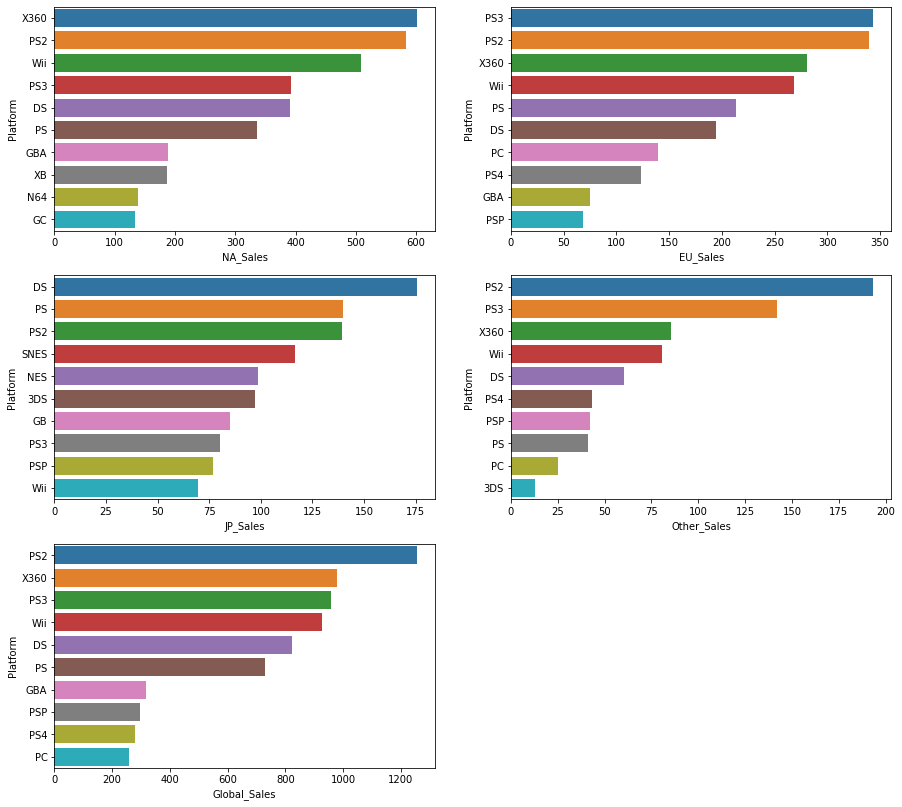

In [147]:
sales_data(vg_data,'Platform')

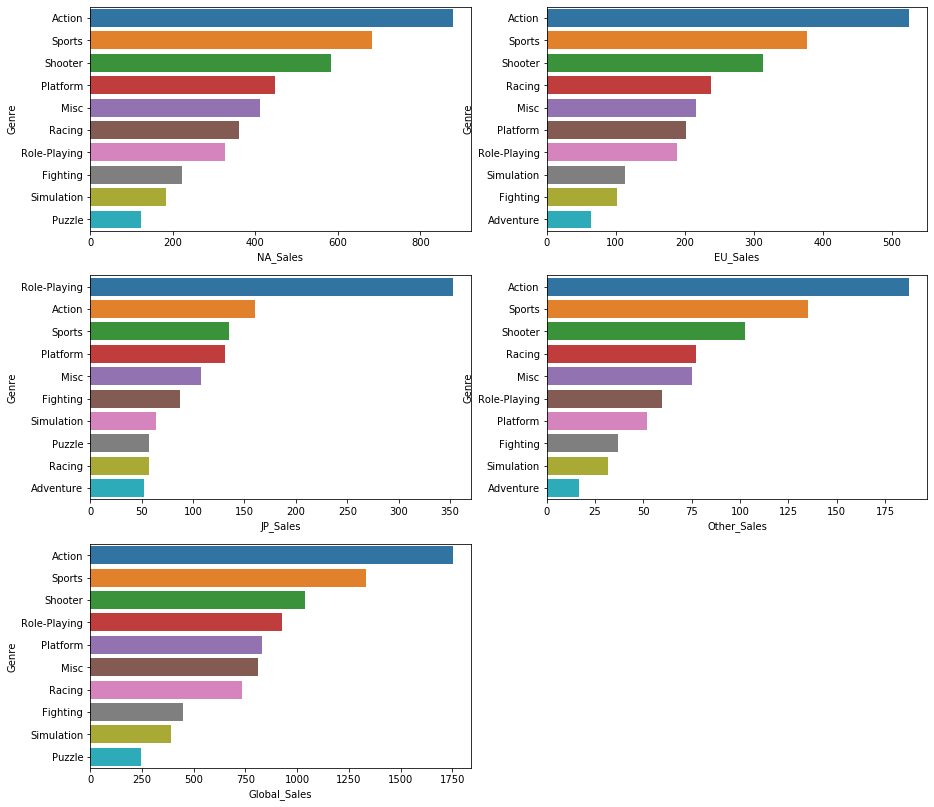

In [138]:
sales_data(vg_data,'Genre')

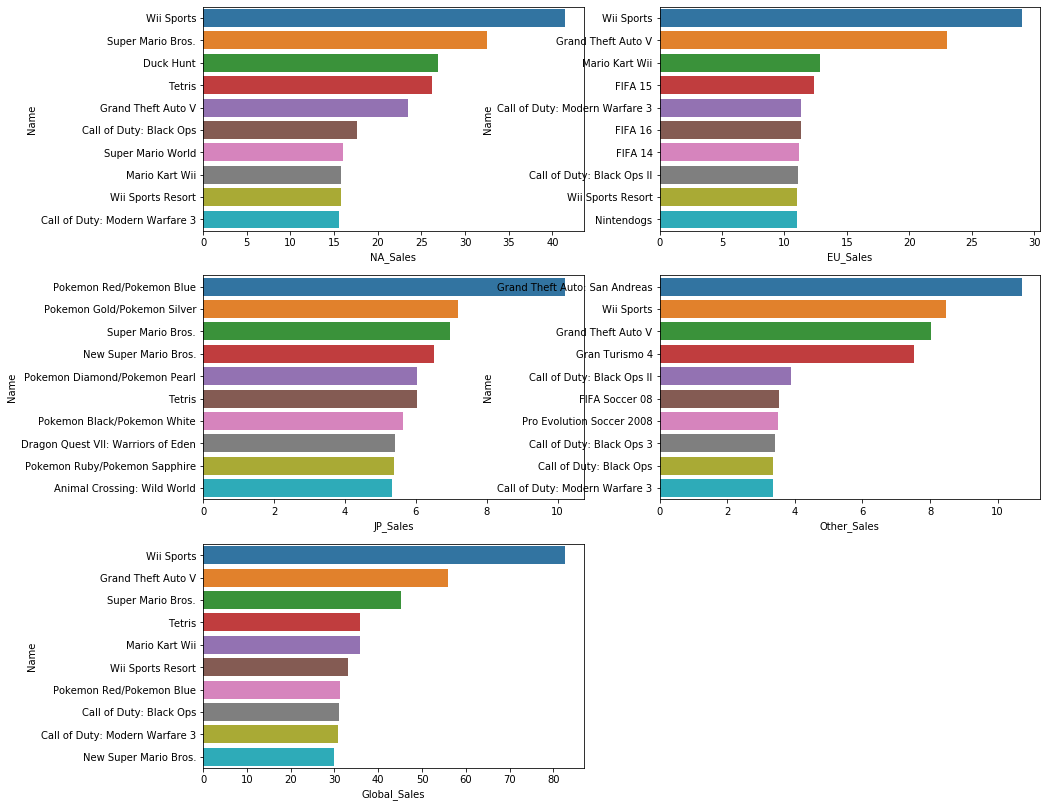

In [139]:
sales_data(vg_data,'Name')

### Release yearwise Global Sales

In [318]:
year_data = vg_data.groupby(['Year']).agg({'Global_Sales':sum}).reset_index().sort_values('Global_Sales',ascending=False)

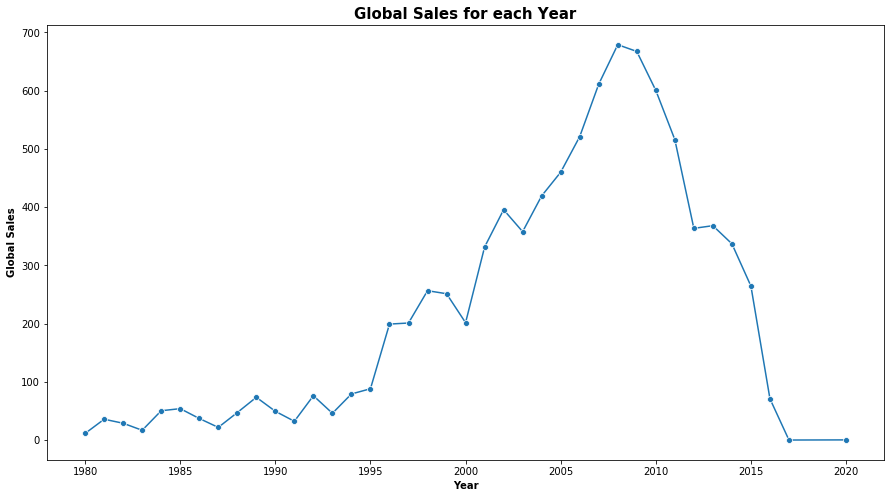

In [355]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Year",y="Global_Sales",data=year_data[year_data["Year"]!=0],marker='o')
plt.title("Global Sales for each Year",fontsize=15,fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Year",fontsize=10,fontweight="bold")
plt.ylabel("Global Sales",fontsize=10,fontweight="bold")
plt.show()

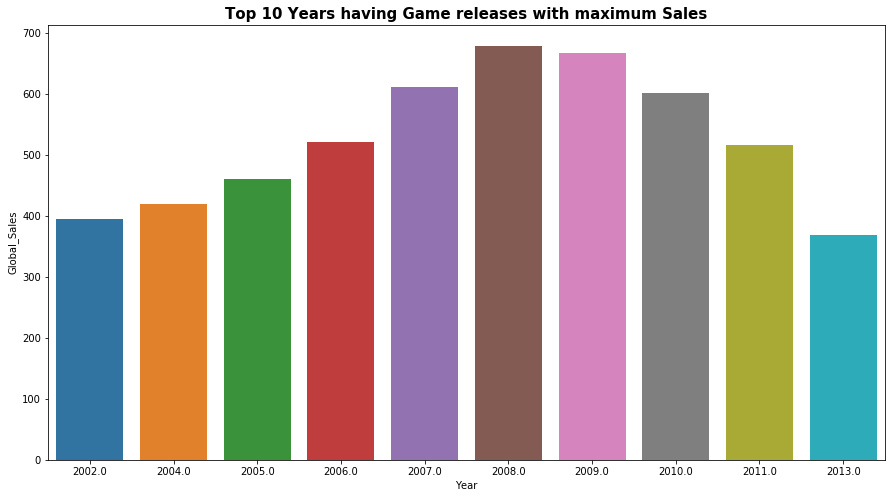

In [297]:
plt.figure(figsize=(15,8))
sns.barplot(x="Year",y="Global_Sales",data=year_data.head(10))
plt.title("Top 10 Years having Game releases with maximum Sales",fontsize=15,fontweight="bold")
plt.show()

### Best Selling Games across the years 

In [227]:
# We'll only be taking a subset of the data i.e years between 2002 and 2013.
# From the barchart above we can see that these years corresponded to the highest sales
pop_data = vg_data[(vg_data['Year']>=2002) & (vg_data['Year']<=2013)]
pop_data.head()                      

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [279]:
# Selecting top selling game from each year using idxmax
best_year_game = pop_data.loc[pop_data.groupby("Year")["Global_Sales"].idxmax()]
best_year_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
104,105,Need for Speed Underground,PS2,2003.0,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [342]:
def game_year(df,col1,col2,col3):
    plt.figure(figsize=(30,12))
    sns.barplot(x=col1,y=col2,data=df)
    for a,b in enumerate(df[col3]):    
        plt.text(a ,y=0 ,s= b,fontsize=15,fontweight="bold",horizontalalignment='center',rotation=60)
    #plt.title("Top Selling games in each year",fontsize=20,fontweight="bold")
    plt.xlabel("Year",fontsize=20,fontweight="bold")
    plt.ylabel("Global Sales",fontsize=20,fontweight="bold")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

### Top Selling games in each year (Top years with highest Sales)

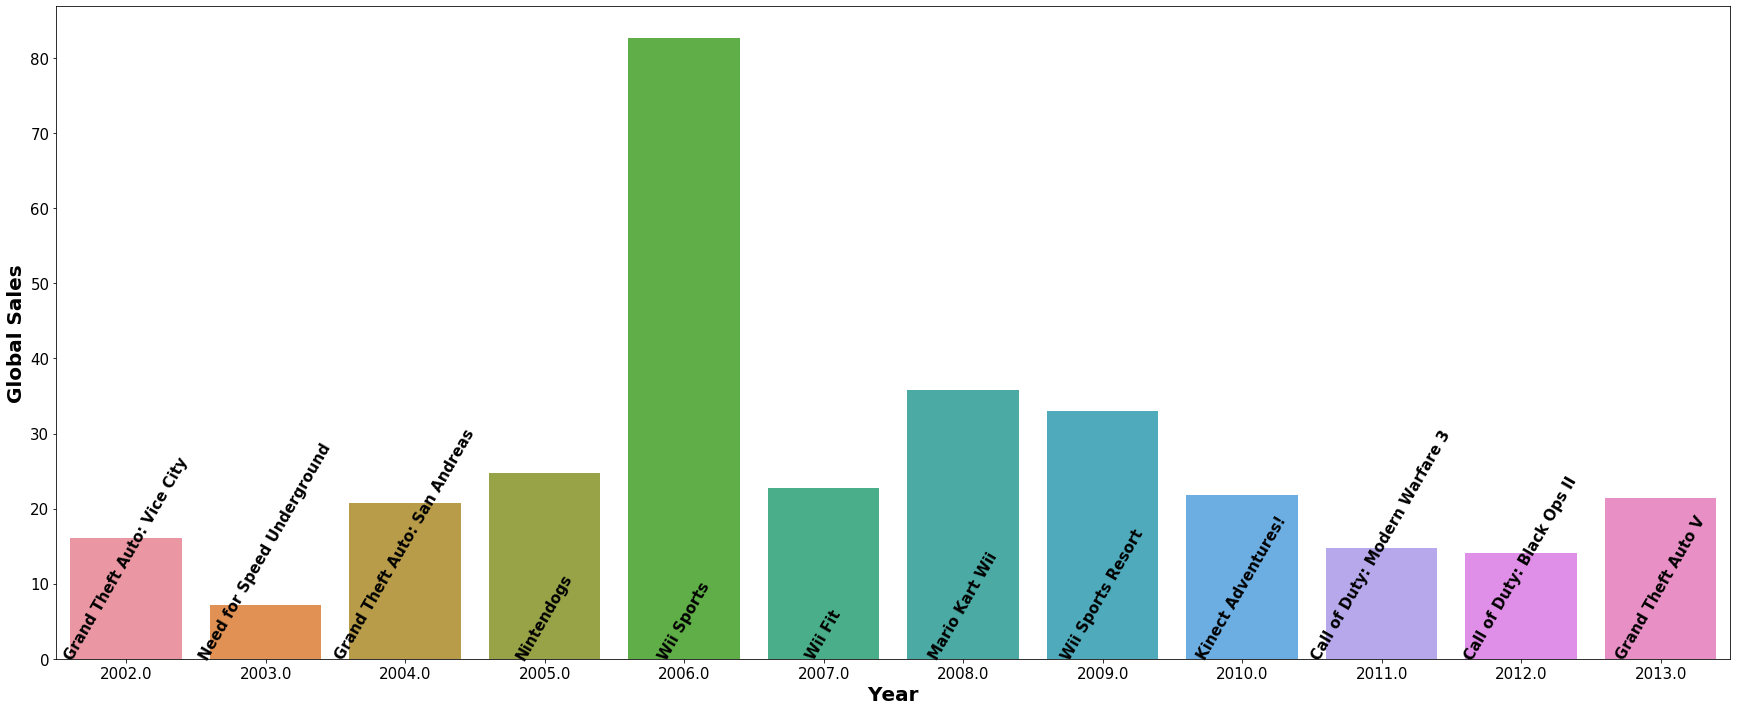

In [343]:
game_year(best_year_game,'Year','Global_Sales','Name')

In [314]:
year_game = vg_data.sort_values("Global_Sales",ascending=False).head(10)
year_game = year_game.sort_values("Year",ascending=True)

### Top 10 games by Global Sales by year released

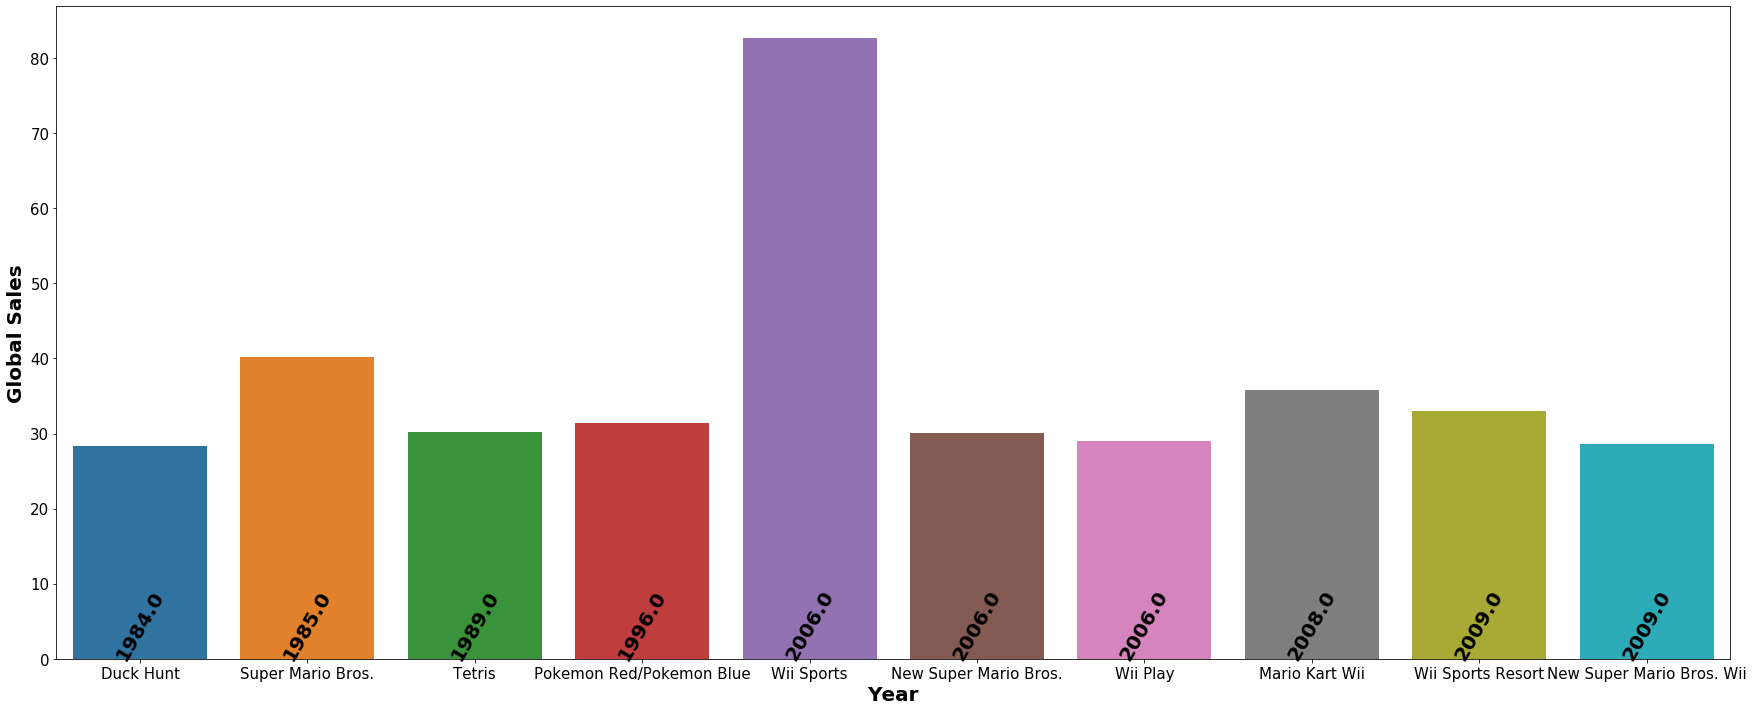

In [341]:
game_year(year_game,'Name','Global_Sales','Year')

In [ ]:
Categorical columns comparison

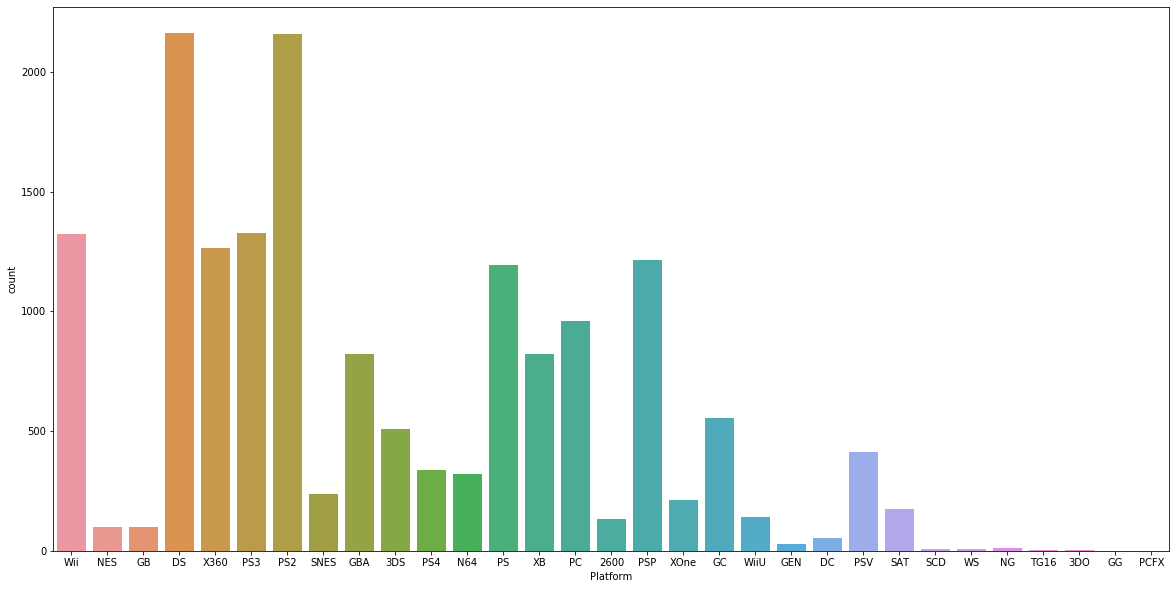

In [347]:
# Number of games corresponding to a platform
plt.figure(figsize=(20,10))
sns.countplot(x="Platform",data=vg_data)
plt.show()

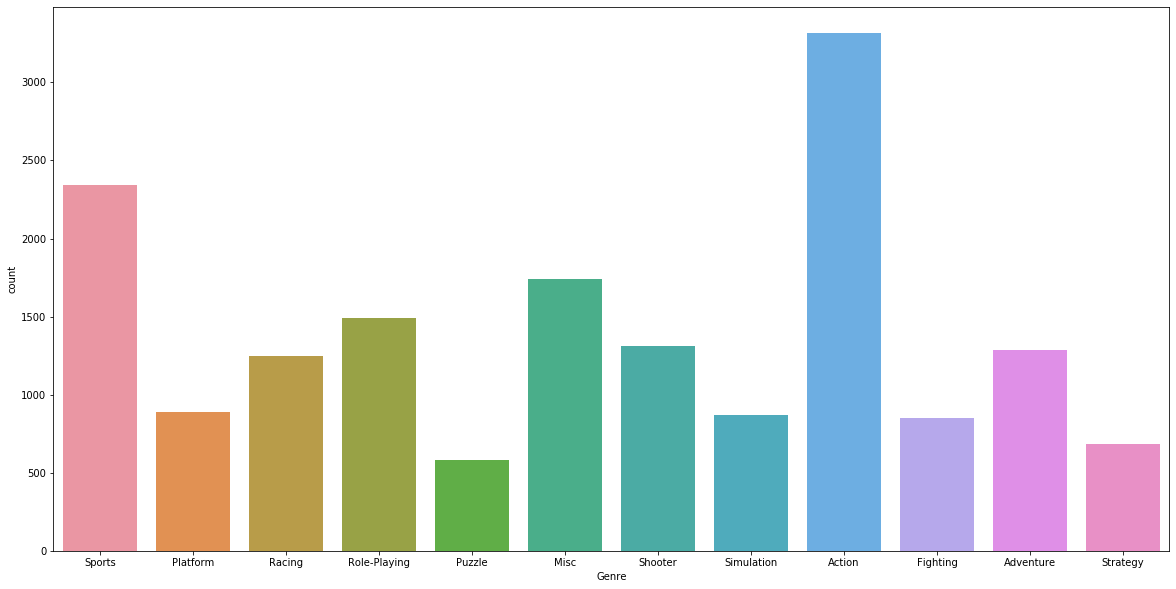

In [350]:
# Number of games corresponding to each Genre
# Some games are said to have multiple genres, but this dataframe has just 1 genre per game
plt.figure(figsize=(20,10))
sns.countplot(x="Genre",data=vg_data)
plt.show()

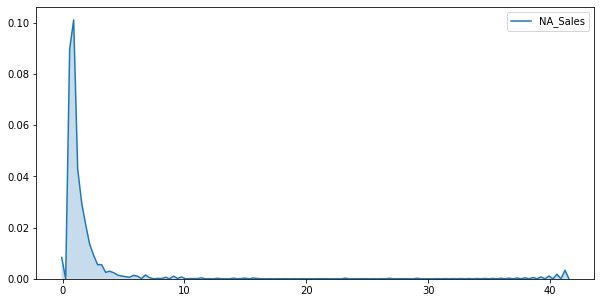

In [370]:
# Distribution of Sales figures. Most are concentrated around 2-4 million for North America
plt.figure(figsize=(10,5))
sns.kdeplot(vg_data["NA_Sales"],shade=True)
plt.show()

### Scatter plot relation between the Sales columns with Global Sales

In [398]:
list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
def scatter_func():
    plt.figure(figsize=(15,10))
    for i in range(1,(len(list)+1)):
        plt.subplot(2,2,i)
        sns.scatterplot(x="Global_Sales",y=list[i-1],hue="Genre",data=vg_data)
        plt.xlabel("Global Sales",fontsize=15,fontweight="bold")
        plt.ylabel(list[i-1],fontsize=15,fontweight="bold")
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    plt.show()

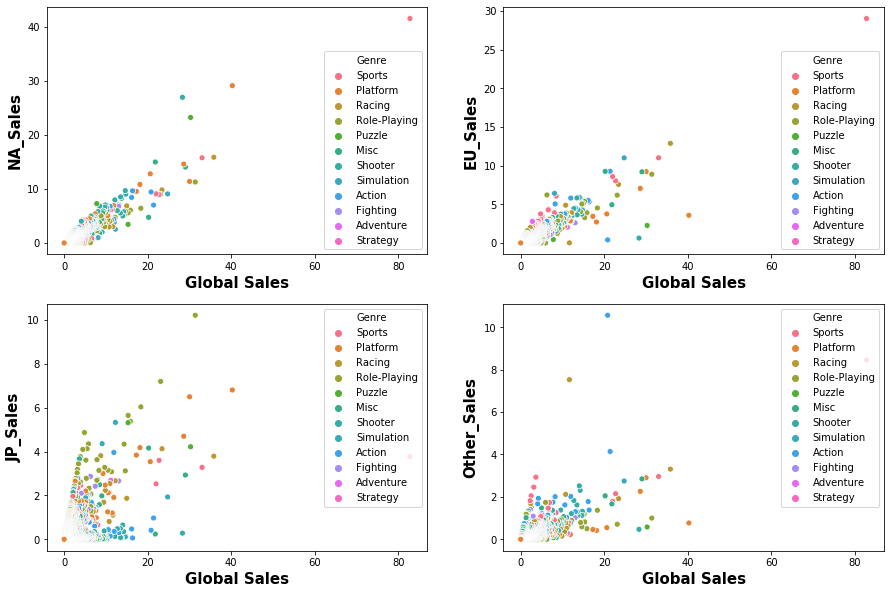

In [399]:
# Clearly we can see a sort of linear relationship between the Sales columns
scatter_func()

## Conclusion:
To conclude, many insights can be generated from the EDA like best selling game, most popular Genre, region wise observations etc. I have mainly used bar plots to show comparison between two columns, but other charts like pie (good for comparison between less categories in a column) or a boxplot (shows the range of a numerical column, great for detecting outliers which was not required here) can also be used.